## Support Vector Machine
### Objective of SVM
$x$ represents the coordinates for each point, $y$ represents the labels, where $y_i \in \{-1,1\}$.
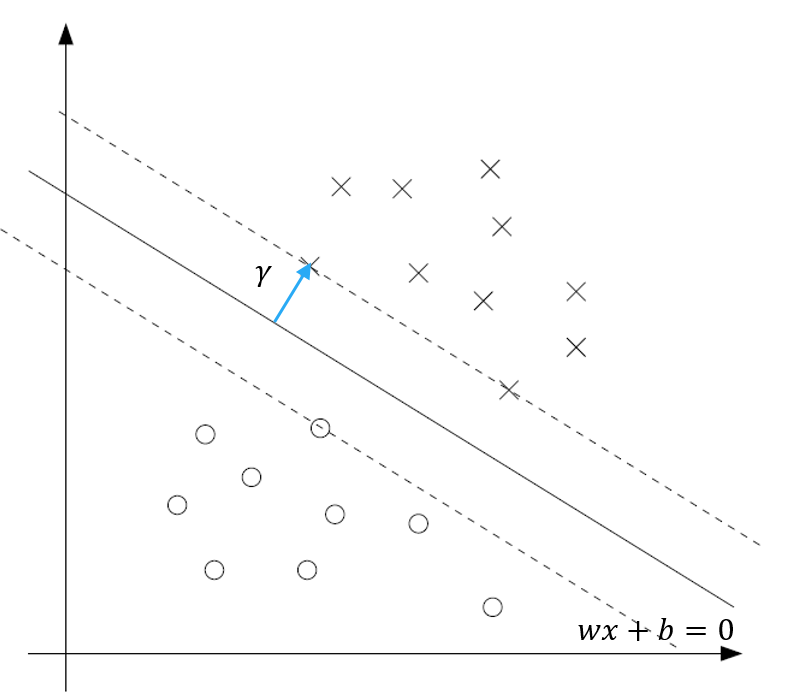
$$
\begin{aligned}
\max_{\gamma,w,b} & \frac{{\gamma}}{||w||} \\
\mathrm{s.t.} & y^{(i)}(w^\top x^{(i)} + b) \ge {\gamma}, i=1..,m
\end{aligned}
$$

Functional margin scales w.r.t. $(w,b)$ without changing the decision boundary. After fixing the margin at 1:

\begin{aligned}
\max_{w,b} & \frac{1}{||w||} = \min_{w,b} \frac{1}{2}||w||^2 \\
\mathrm{s.t.} \qquad & -y^{(i)}(w^\top x^{(i)} + b) + 1 \le 0, i=1..,m
\end{aligned}

---
### SVM Optimization

Primal problem:
$$
\mathcal{L}(w,b,\alpha)=\frac{1}{2}||w||^2 - \sum_{i=1}^{m}\alpha_i[y^{(i)}(w^\top x^{(i)}+b) - 1] \\
\min_{w,b} \max_{\alpha: \alpha_i \ge 0} \mathcal{L}(w,b,\alpha)
$$

Dual problem:
$$
\max_{\alpha: \alpha_i \ge 0} \min_{w,b} \mathcal{L}(w,b,\alpha)
$$

According to KKT, the optimal solution $w^*,b^*,a^*$ satisfies:
$$
\begin{aligned}
\frac{\partial \mathcal{L}(w,b,\alpha)}{\partial w^*} & = 0 \\
\frac{\partial \mathcal{L}(w,b,\alpha)}{\partial b^*} & = 0 \\
\alpha_i^* & \ge 0
\end{aligned}
$$

Next:
$$
\frac{\partial \mathcal{L}(w,b,\alpha)}{\partial w} = w-\sum_{i=1}^{m}\alpha_i y^{(i)}x^{(i)}=0 \Rightarrow w=\sum_{i=1}^{m}\alpha_i y^{(i)}x^{(i)} \\
\frac{\partial \mathcal{L}(w,b,\alpha)}{\partial b} = \sum_{i=1}^{y^{(i)}} \alpha_i y^{(i)}=0
$$

So the **Lagrangian** can be re-written as:
$$
\begin{aligned}
\mathcal{L}(w,b,\alpha) & = \sum_{i=1}^{m} \alpha_i - \frac{1}{2}\sum_{i=1}^{m} \sum_{j=1}^{m} y^{(i)} y^{(j)} \alpha_i \alpha_j x^{(i)\top} x^{(j)}.
\end{aligned}
$$

If we obtain the final $\alpha$, the **prediction model** can be expressed as:
$$
\begin{aligned}
w^* & = \sum_{i=1}^{m} \alpha_i y^{(i)} x^{(i)} \\
b^* & = -\frac{1}{2}(\max_{i:y^{(i)}=-1} w^{*\top} x^{(i)} + \min_{i:y^{(i)}=1} w^{*\top} x^{(i)}) \\
f(x)& =w^{*\top}x+b^* = \sum_{i=1}^{m} \alpha_i y^{(i)}<x^{(i)},x> + b^*
\end{aligned}
$$

The **dual problem** becomes:
$$
\begin{aligned}
\max_{\alpha: \alpha_i \ge 0} \min_{w,b} \mathcal{L}(w,b,\alpha) = \max_{\alpha: \alpha_i \ge 0} \sum_{i=1}^{m} \alpha_i - \frac{1}{2}\sum_{i=1}^{m} \sum_{j=1}^{m} y^{(i)} y^{(j)} \alpha_i \alpha_j x^{(i)\top} x^{(j)} \\
= \min_{\alpha: \alpha_i \ge 0} \frac{1}{2}\sum_{i=1}^{m} \sum_{j=1}^{m} y^{(i)} y^{(j)} \alpha_i \alpha_j x^{(i)\top} x^{(j)} - \sum_{i=1}^{m} \alpha_i \\
= \min_{\alpha: \alpha_i \ge 0} \frac{1}{2}\sum_{i=1}^{m} \sum_{j=1}^{m} y^{(i)} y^{(j)} \alpha_i \alpha_j K(i,j) - \sum_{i=1}^{m} \alpha_i\\
\mathcal{s.t.} \qquad \sum_{i=1}^{y^{(i)}} \alpha_i y^{(i)}=0 \quad \mathrm{and} \quad \alpha_i \ge 0
\end{aligned}
$$
where $K=x \cdot x^{\textrm{T}}$ is the kernel.

**Non-separable case**:
$$
\min_{\alpha: \alpha_i \ge 0} \frac{1}{2}\sum_{i=1}^{m} \sum_{j=1}^{m} y^{(i)} y^{(j)} \alpha_i \alpha_j K(i,j) - \sum_{i=1}^{m} \alpha_i \\
\mathcal{s.t.} \qquad \sum_{i=1}^{m} \alpha_i y^{(i)}=0 \quad \mathrm{and} \quad 0 \le \alpha_i \le C
$$

---
### SMO Algorithm
**Do**

*Randomly select a pair of $<\alpha_i, \alpha_j>$ and optimize it while fixing other variables.*

**Until converge.**

**Example**: optimize $\alpha_1,\alpha_2$ while fixing other variables.
$$
\arg \min_{\alpha_1, \alpha_2} \mathcal{W}(\alpha_1,\alpha_2) =
\frac{1}{2}[\alpha_1^2 K(1,1) + \alpha_2^2 K(2,2)] +
\alpha_1\alpha_2 y^{(1)} y^{(2)} K(1,2) + \alpha_1 y^{(1)} \sum_{i=3}^{m}\alpha_i y^{(i)} K(i,1) + \alpha_2 y^{(2)}\sum_{i=3}^{m}\alpha_i y^{(i)} K(i,2) - \alpha_1 - \alpha_2,
$$

$$
\sum_{i=1}^{m} \alpha_i y^{(i)}=0 \qquad \Rightarrow \qquad \alpha_1 y^{(1)} + \alpha_2 y^{(2)} = - \sum_{i=3}^{m} \alpha_i y^{(i)} = \zeta \qquad \Rightarrow \qquad \alpha_1 = \zeta y^{(1)} - \alpha_2 y^{(1)}y^{(2)},
$$

$$
\begin{aligned}
\frac{\partial \mathcal{W}}{\partial \alpha_2} & =
[K(1,1)\alpha_2 - \zeta y^{(2)} K(1,1)]
+ [K(2,2)\alpha_2]
+ [\zeta y^{(2)} K(1,2) - 2K(1,2)\alpha_2]
- [y^{(2)} \sum_{i=3}^{m} \alpha_i y^{(i)} K(i,1)]
+ [y^{(2)} \sum_{i=3}^{m} \alpha_i y^{(i)} K(i,2)]
+ y^{(1)} y^{(2)}
- 1 \\
& = [K(1,1) + K(2,2) - 2K(1,2)]\alpha_2 + y^{(2)}[-\zeta + \zeta K(1,2) + \sum_{i=3}^{m} \alpha_i y^{(i)} K(i,2) - \sum_{i=3}^{m} \alpha_i y^{(i)} K(i,1) + y^{(1)} - y^{(2)}]  = 0\\
\end{aligned}
$$

Since
$$
\begin{aligned}
f(x) & = \sum_{i=1}^{m} y^{(i)} \alpha_i <x^{(i)}, x> + b, \\
\Rightarrow \\
\sum_{i=3}^{m} \alpha_i y^{(i)} K(i,1) & = f(x_1) - \alpha_1^{old} y^{(1)} K(1,1) - \alpha_2^{old} y^{(2)} K(2,1) - b, \\
\sum_{i=3}^{m} \alpha_i y^{(i)} K(i,2) & = f(x_2) - \alpha_1^{old} y^{(1)} K(1,2) - \alpha_2^{old} y^{(2)} K(2,2) - b, \\
\end{aligned}
$$

$$
\begin{aligned}
\frac{\partial \mathcal{W}}{\partial \alpha_2} & = 
[K(1,1) + K(2,2) - 2K(1,2)]\alpha_2 + y^{(2)}[-\zeta K(1,1) + \zeta K(1,2) + f(x_2) - f(x_1) +
\alpha_1^{old} y^{(1)}(K(1,1)-K(1,2)) + \alpha_2^{old} y^{(2)} (K(2,1) - K(2,2)) - y^{(2)}] \\
& = [K(1,1) + K(2,2) - 2K(1,2)]\alpha_2 + [2K(1,2)-K(1,1)-K(2,2)]\alpha_2^{old} + y^{(2)}[(f(x_2) - y^{(2)}) - (f(x_1) - y^{(1)})] \\
\end{aligned}
$$

Let $\eta = K(1,1) + K(2,2) - 2 K(1,2)$, $e_i = f(x_i)-y^{(i)}$,
$$
\frac{\partial \mathcal{W}}{\partial \alpha_2} = \eta \alpha_2  - \eta \alpha_2^{old} + y^{(2)} (e_2 - e_1) = 0
\qquad
\Rightarrow
\qquad
\alpha_2 = \alpha_2^{old} - \frac{y^{(2)}(e_2 - e_1)}{\eta}
$$

Then, clip $\alpha_2$ such that, $0 \le \alpha_1, \alpha_2 \le C$:
$$
0 \le \alpha_2 \le C \\
0 \le \zeta y^{(1)} - \alpha_2 y^{(1)} y^{(2)}  \le C \\
$$

Finally, update $\alpha_1$ and bias $b$.

<img src="./svm/1.png" width=640 height=640 />
<img src="./svm/2.png" width=640 height=640 />
<img src="./svm/3.png" width=640 height=640 />
<img src="./svm/4.png" width=640 height=640 />
<img src="./svm/5.png" width=640 height=640 />
<img src="./svm/6.png" width=640 height=640 />
<img src="./svm/7.png" width=640 height=640 />
<img src="./svm/8.png" width=640 height=640 />
<img src="./svm/9.png" width=640 height=640 />
<img src="./svm/10.png" width=640 height=640 />
<img src="./svm/11.png" width=640 height=640 />
<img src="./svm/12.png" width=640 height=640 />
<img src="./svm/13.png" width=640 height=640 />
<img src="./svm/14.png" width=640 height=640 />
<img src="./svm/15.png" width=640 height=640 />
<img src="./svm/16.png" width=640 height=640 />
<img src="./svm/17.png" width=640 height=640 />
<img src="./svm/18.png" width=640 height=640 />
<img src="./svm/19.png" width=640 height=640 />
<img src="./svm/20.png" width=640 height=640 />
<img src="./svm/21.png" width=640 height=640 />
<img src="./svm/22.png" width=640 height=640 />
<img src="./svm/23.png" width=640 height=640 />
<img src="./svm/24.png" width=640 height=640 />
<img src="./svm/25.png" width=640 height=640 />
<img src="./svm/26.png" width=640 height=640 />
<img src="./svm/27.png" width=640 height=640 />

---
### SVM Implementation
- svm_smo($x$, $y$, ker, $C$, max\_iter, epsilon)
    - $x \in \mathbf{R}^{n \times D}$ is the input data
    - $y \in \mathbf{R}^{n}$ is the label
    - ker($x, z$) is the kernel function
    - $0 \le \alpha_i \le C$
    - max\_iter: maximum of iterations
    - epsilon: avoid floating error

In [1]:
import numpy as np

def clip(value, lower, upper):
    if value < lower:
        return lower
    if value > upper:
        return upper
    return value

def default_ker(x, z):
    return x.dot(z.T)

def svm_smo(x, y, ker, C, max_iter, epsilon=1e-5):
    # initialization
    n, _ = x.shape
    alpha = np.zeros((n,))
        
    K = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            K[i, j] = ker(x[i], x[j])
    
    iter = 0
    while iter <= max_iter:
        
        for i in range(n):
            # randomly choose an index j, where j is not equal to i
            j = np.random.randint(low=0, high=n-1)
            while (i==j): j = np.random.randint(low=0, high=n-1)
            
            # update alpha_i
            eta = K[j, j] + K[i, i] - 2.0 * K[i, j]
            if np.abs(eta) < epsilon: continue # avoid numerical problem
            
            e_i = (K[:, i] * alpha * y).sum() - y[i]
            e_j = (K[:, j] * alpha * y).sum() - y[j]
            alpha_i = alpha[i] - y[i] * (e_i - e_j) / eta
            
            # clip alpha_i
            lower, upper = 0, C
            zeta = alpha[i] * y[i] + alpha[j] * y[j]
            if y[i] == y[j]:
                lower = max(lower, zeta / y[j] - C)
                upper = min(upper, zeta / y[j])
            else:
                lower = max(lower, -zeta / y[j])
                upper = min(upper, C - zeta / y[j])
                
            alpha_i = clip(alpha_i, lower, upper)
            alpha_j = (zeta - y[i] * alpha_i) / y[j]
            
            alpha[i], alpha[j] = alpha_i, alpha_j
        
        iter += 1
    
    # calculate b
    b = 0
    for i in range(n):
        if epsilon < alpha[i] < C - epsilon:
            b = y[i] - (y * alpha * K[:, i]).sum()
    
    def f(X): # predict the point X based on alpha and b
        results = []
        for k in range(X.shape[0]):
            result = b
            for i in range(n):
                result += y[i] * alpha[i] * ker(x[i], X[k])
            results.append(result)
        return np.array(results)
    
    return f, alpha, b

### Datasets
#### Data visualization

In [2]:
def data_visualization(x, y):
    import matplotlib.pyplot as plt
    category = {'+1': [], '-1': []}
    for point, label in zip(x, y):
        if label == 1.0: category['+1'].append(point)
        else: category['-1'].append(point)
    fig = plt.figure()
    ax = fig.add_subplot(111)

    for label, pts in category.items():
        pts = np.array(pts)
        ax.scatter(pts[:, 0], pts[:, 1], label=label)
    plt.show() 

#### Synthetic dataset
Create a ramdom dataset on 2D plane, with $n$ points in total, and $n_0$,$n_1$ points on the two boundaries respectively,
* random a line on the plane (decision line)
* random $n$ points 
* random $n$ distance (the distance from the each point to the decision line)
* shift $n$ points to satisfy the distance constraint

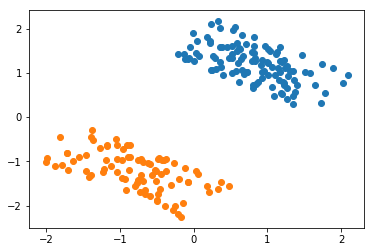

In [3]:
import numpy as np

# random a dataset on 2D plane
def simple_synthetic_data(n, n0=5, n1=5): # n: number of points, n0 & n1: number of points on boundary
    # random a line on the plane
    w = np.random.rand(2) 
    w = w / np.sqrt(w.dot(w))
    
    # random n points 
    x = np.random.rand(n, 2) * 2 - 1
    d = (np.random.rand(n) + 1) * np.random.choice([-1,1],n,replace=True) # random distance from point to the decision line, d in [-2,-1] or [1,2]. d=-1 or d=1 indicate the boundary in svm
    d[:n0] = -1
    d[n0:n0+n1] = 1
    
    # shift x[i] to make the distance between x[i] and the decision become d[i]
    x = x - x.dot(w).reshape(-1,1) * w.reshape(1,2) + d.reshape(-1,1) * w.reshape(1,2)
    
    # create labels
    y = np.zeros(n)
    y[d < 0] = -1
    y[d >= 0] = 1
    return x, y

x, y = simple_synthetic_data(200)
data_visualization(x, y)

#### Spiral dataset
Directly load data from txt file

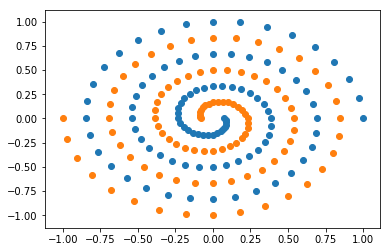

In [4]:
def spiral_data():
    data = np.loadtxt('/kaggle/input/svm-demo/spiral.txt')
    x = data[:,:2]
    y = data[:,2]
    return x, y

x, y = spiral_data()
data_visualization(x, y)

---
### SVM for simple synthetic data

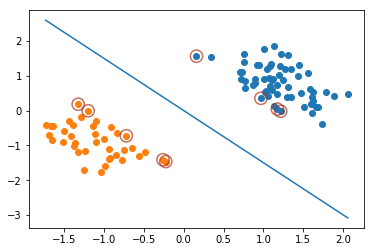

In [5]:
# load the synthetic data
x, y = simple_synthetic_data(100, n0=5, n1=5)

# run svm classifier
ker = default_ker
model, alpha, bias = svm_smo(x, y, ker, 1e10, 1000)

# visualize the result
import matplotlib.pyplot as plt
category = {'+1': [], '-1': []}
for point, label in zip(x, y):
    if label == 1.0: category['+1'].append(point)
    else: category['-1'].append(point)
fig = plt.figure()
ax = fig.add_subplot(111)

# plot points
for label, pts in category.items():
    pts = np.array(pts)
    ax.scatter(pts[:, 0], pts[:, 1], label=label)

# calculate weight
weight = 0
for i in range(alpha.shape[0]):
    weight += alpha[i] * y[i] * x[i]

# plot the model: wx+b
x1 = np.min(x[:, 0])
y1 = (-bias - weight[0] * x1) / weight[1]
x2 = np.max(x[:, 0])
y2 = (-bias - weight[0] * x2) / weight[1]
ax.plot([x1, x2], [y1, y2])

# plot the support vectors
for i, alpha_i in enumerate(alpha):
    if abs(alpha_i) > 1e-3: 
        ax.scatter([x[i, 0]], [x[i, 1]], s=150, c='none', alpha=0.7,
                   linewidth=1.5, edgecolor='#AB3319')
            
plt.show()

### Kernel Function: $x \rightarrow \phi(x)$
- Polynomial: $(x^\top z)^d$
- Cosine similarity: $\frac{x^\top z}{||x|| \cdot ||z||}$
- RBF: $\exp(-\frac{||x-z||^2}{2 \sigma^2})$

In [6]:
def poly_ker(d): # polynomial
    def ker(x, z): 
        return (x.dot(z.T)) ** d
    return ker

def cos_ker(x, z): # cosine similarity
    return x.dot(z.T) / np.sqrt(x.dot(x.T)) / np.sqrt(z.dot(z.T))
    
def rbf_ker(sigma): # rbf kernel
    def ker(x, z):
        return np.exp(-(x - z).dot((x - z).T) / (2.0 * sigma ** 2))
    return ker

### SVM for spiral data

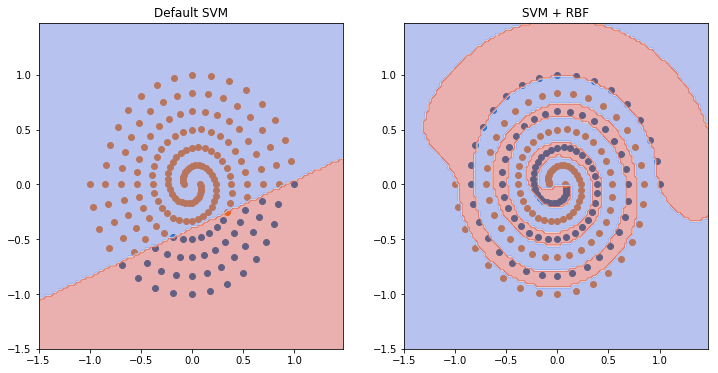

In [7]:
import matplotlib.pyplot as plt
from matplotlib import cm

def plot(ax, model, x, title):
    y = model(x)
    y[y < 0], y[y >= 0] = -1, 1

    category = {'+1': [], '-1': []}
    for point, label in zip(x, y):
        if label == 1.0: category['+1'].append(point)
        else: category['-1'].append(point)
    for label, pts in category.items():
        pts = np.array(pts)
        ax.scatter(pts[:, 0], pts[:, 1], label=label)
    
    # plot boundary
    p = np.meshgrid(np.arange(-1.5, 1.5, 0.025), np.arange(-1.5, 1.5, 0.025))
    x = np.array([p[0].flatten(), p[1].flatten()]).T
    y = model(x)
    y[y < 0], y[y >= 0] = -1, 1
    y = np.reshape(y, p[0].shape)
    ax.contourf(p[0], p[1], y, cmap=plt.cm.coolwarm, alpha=0.4)
    
    # set title
    ax.set_title(title)

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x, y = spiral_data()

# plot points
model_default, _, _ = svm_smo(x, y, default_ker, 1e10, 200)
plot(ax1, model_default, x, 'Default SVM')

ker = rbf_ker(0.2)
# ker = poly_ker(5)
# ker = cos_ker
model_ker, _, _ = svm_smo(x, y, ker, 1e10, 200)
plot(ax2, model_ker, x, 'SVM + RBF')

plt.show()

### SVM in scikit-learn
API: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

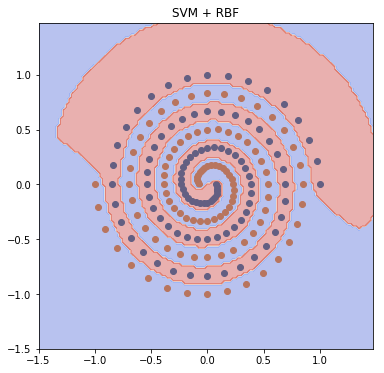

In [8]:
from sklearn import svm
# x, y = simple_synthetic_data(50, 5, 5)
x, y = spiral_data()

model = svm.SVC(kernel='rbf', gamma=50, tol=1e-6)
model.fit(x, y)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plot(ax, model.predict, x, 'SVM + RBF')
plt.show()